## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

**Given that we are trying to shortlist candidates and identify those with higher chances of VISA approval, our strategy will be to use a classification model to minimize false positives and use precision as our metric of choice.**

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import RandomizedSearchCV

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [ ]:
#Connecting to google colab
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# Loading the dataset and making a copy of the original
data = pd.read_csv('/content/drive/MyDrive/Datasets/EasyVisa.csv')
df = data.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [4]:
#Reading the first 5 rows of the dataset
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


#### Understand the shape of the dataset

In [5]:
#Reading the number of rows and columns in the dataset
df.shape

(25480, 12)

There are 25480 rows, and 12 columns in the dataset

#### Check the data types of the columns for the dataset

In [6]:
#Checking the data types of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


There are 9 categorical and 3 numerical variables in the dataset

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [7]:
#Getting a statistical summary of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


* There are negative values in the "no_of_employees" column that will need to be repaired as negative numbers are impossible in that variable.
* Company establishment ranges from 1800 - 2016 with the average being around 1979.
* With "prevailing_wage" being influenced by up to 4 different "unit(s)_of_wage", we may need to combine the data from these two columns to come up with one measurement for all.  The minimum is 2.1367 (assuming "hourly") and the max is 319210.27 (assuming "yearly"). We'll make that determination after modelling.

#### Fixing the negative values in number of employees columns

In [8]:
#Converting # of employees to absolute values to remove negatives
df['no_of_employees'] = abs(df['no_of_employees'])

#### Let's check the count of each unique category in each of the categorical variables

In [9]:
#Printing the value counts for each column in the dataset
for columns in df.columns:
    print(columns)
    print(df[columns].value_counts())
    print('-'*100)
    print('\n')

case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
----------------------------------------------------------------------------------------------------


continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
----------------------------------------------------------------------------------------------------


education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
----------------------------------------------------------------------------------------------------


has_job_experience
Y    14802
N    10678
Name: has_job_experience, dtype: int64
---------------------------------------------------------------------

* Case ID is unique to each entry in the dataset and will be removed.
* We don't see any missing data or NaN's in the dataset.
* We'll map 'education' in such a way as to reflect the ordinal values.

In [10]:
#Mapping the education column to give it a more ordered relationship
df['education_of_employee'] = df['education_of_employee'].map({"High School": 1, "Bachelor's": 2, "Master's": 3, 'Doctorate': 4})

### Univariate Analysis

In [11]:
#Defining a function to create histograms and boxplots to visualize the data
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# Function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """ Barplot with percentages"""
    total = len(data[feature]) #gets the length of the column
    count = data[feature].nunique()
    if n is None:
      plt.figure(figsize=(count + 2, 6))
    else:
      plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total) # percentage of class
        else:
            label = p.get_height() # count of each level of the category
        x = p.get_x() + p.get_width() / 2 # width of the plot
        y = p.get_height() # height of the plot
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        ) # annotate the percentage

    plt.show() #show plot

#### Observations on education of employee

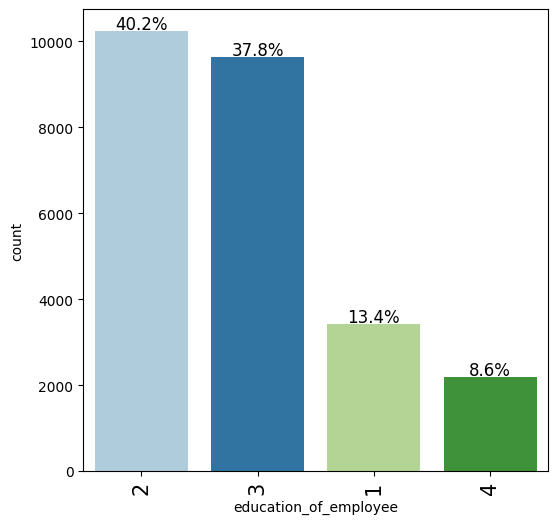

In [13]:
#Visualizing the distribution of education
labeled_barplot(df, 'education_of_employee', perc=True)

About 77% of the employees in the dataset have either a Bachelor's or Master's degree. 13% have a high school education and the fewest (8%) hold a Doctorate.

#### Observations on region of employment

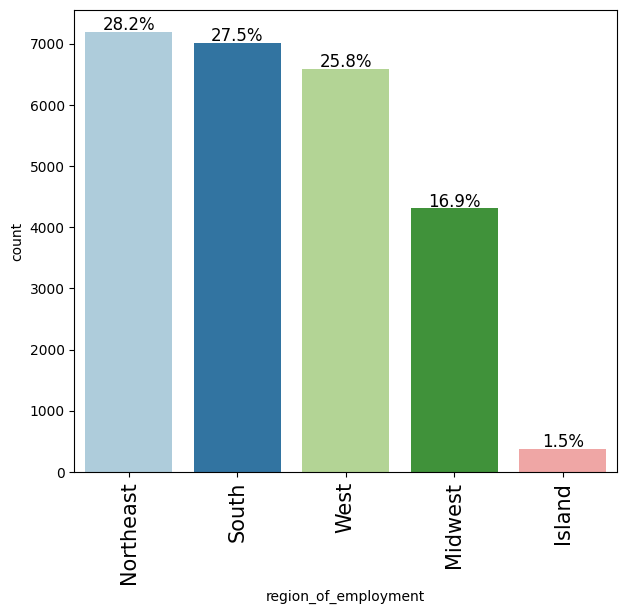

In [14]:
#Visualizing the distribution for employment
labeled_barplot(df, 'region_of_employment', perc=True)

Northeast, South, and West all show similar percentages of the distribution, while Midwest and Island carry the lowest percentage of the distribution.

#### Observations on job experience

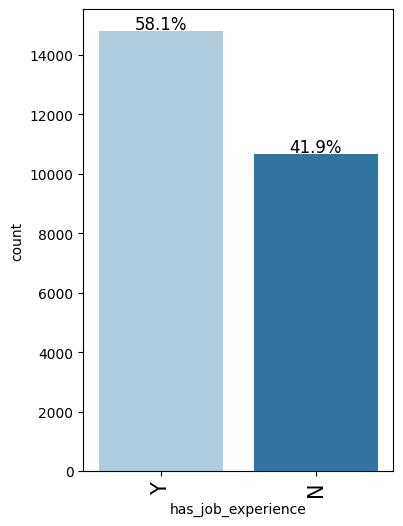

In [15]:
#Visualizing the distribution for job experience
labeled_barplot(df, 'has_job_experience', perc=True)

58% of applicants have job experience.

#### Observations on case status

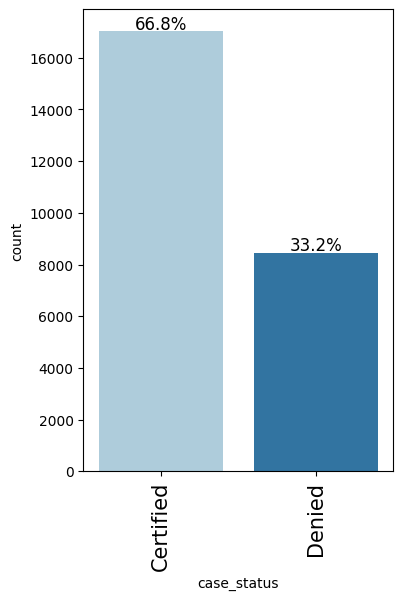

In [16]:
#Visualizing the distribution of case status
labeled_barplot(df, 'case_status', perc=True)

Our target variable is slightly imbalanced with 67% positive (certified) and 33% negative (denied). We may need to stratify our datasets or employ some imblearn techniques a bit later.

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [17]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of " + str(target_uniq[0]) + " Cases")
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of " + str(target_uniq[1]) + " Cases")
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [18]:
#Defining a function to create stacked barplots
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

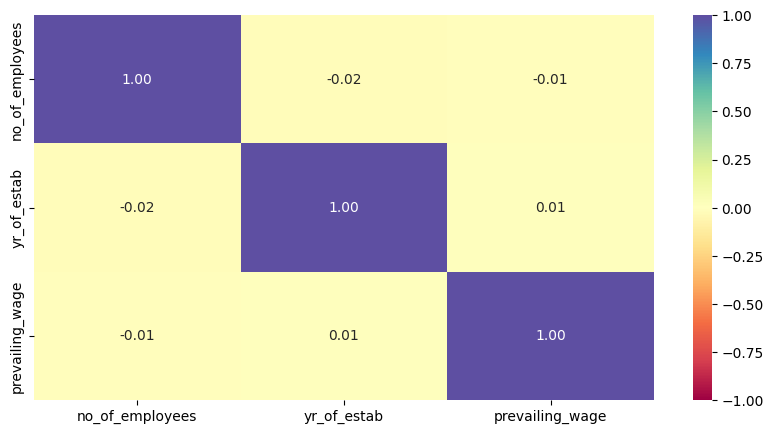

In [19]:
#Checking the correlation of the numeric variables to case status
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

*There is very little correlation between the numeric variables and the case status.

#### Does higher education increase the chances of visa certification for well-paid jobs abroad?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
2                           6367    3867  10234
1                           1164    2256   3420
3                           7575    2059   9634
4                           1912     280   2192
------------------------------------------------------------------------------------------------------------------------


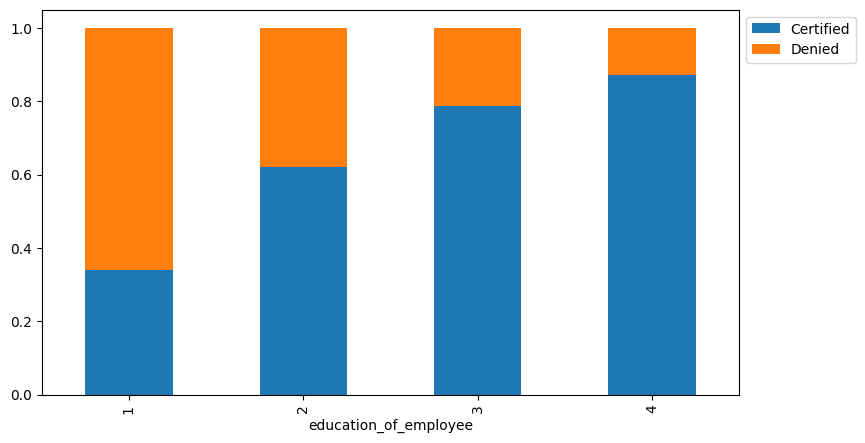

In [20]:
#Checking the distribution of our target variable within the education variable
stacked_barplot(df, 'education_of_employee', 'case_status')

According to the dataset, the more educated an employee is, the better the chance that their visa will be certified. For example, Doctors have around an ~85% chance of being certified while those with only a High School diploma have around a ~35% chance of being certified.

#### How does visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


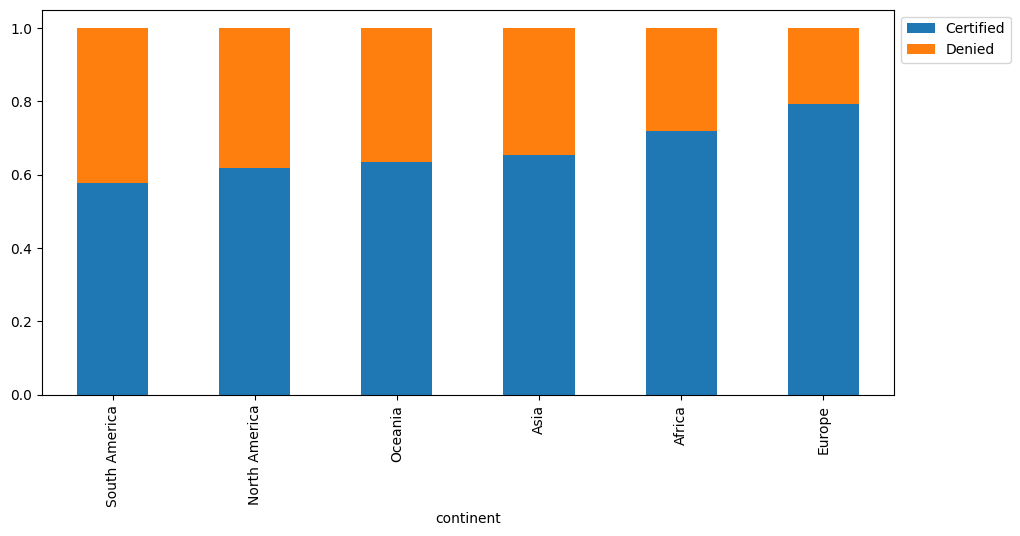

In [21]:
#Checking the distribution of our target variable within the continent variable
stacked_barplot(df, 'continent', 'case_status')

There seems to be very little correlation between the continents and visa status. All continents range from around ~60 - 80% acceptance rates.

#### Does having prior work experience influence the chances of visa certification for career opportunities abroad?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


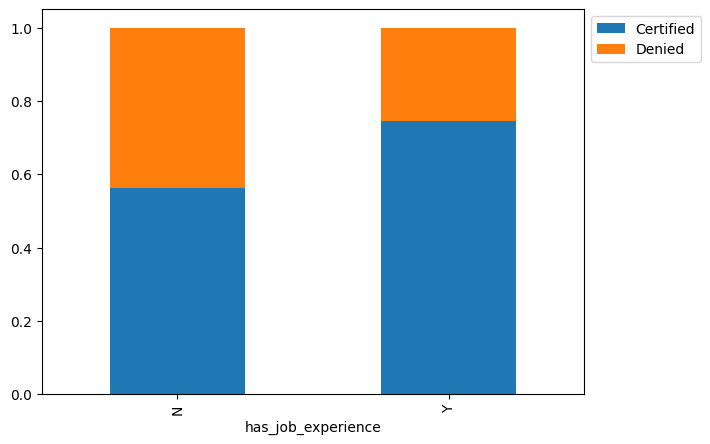

In [22]:
#Checking the distribution of our target variable within the job experience variable
stacked_barplot(df, 'has_job_experience', 'case_status')

Having prior work experience seems to have around a ~20% better chance or being certified.

#### Is the prevailing wage consistent across all regions of the US?

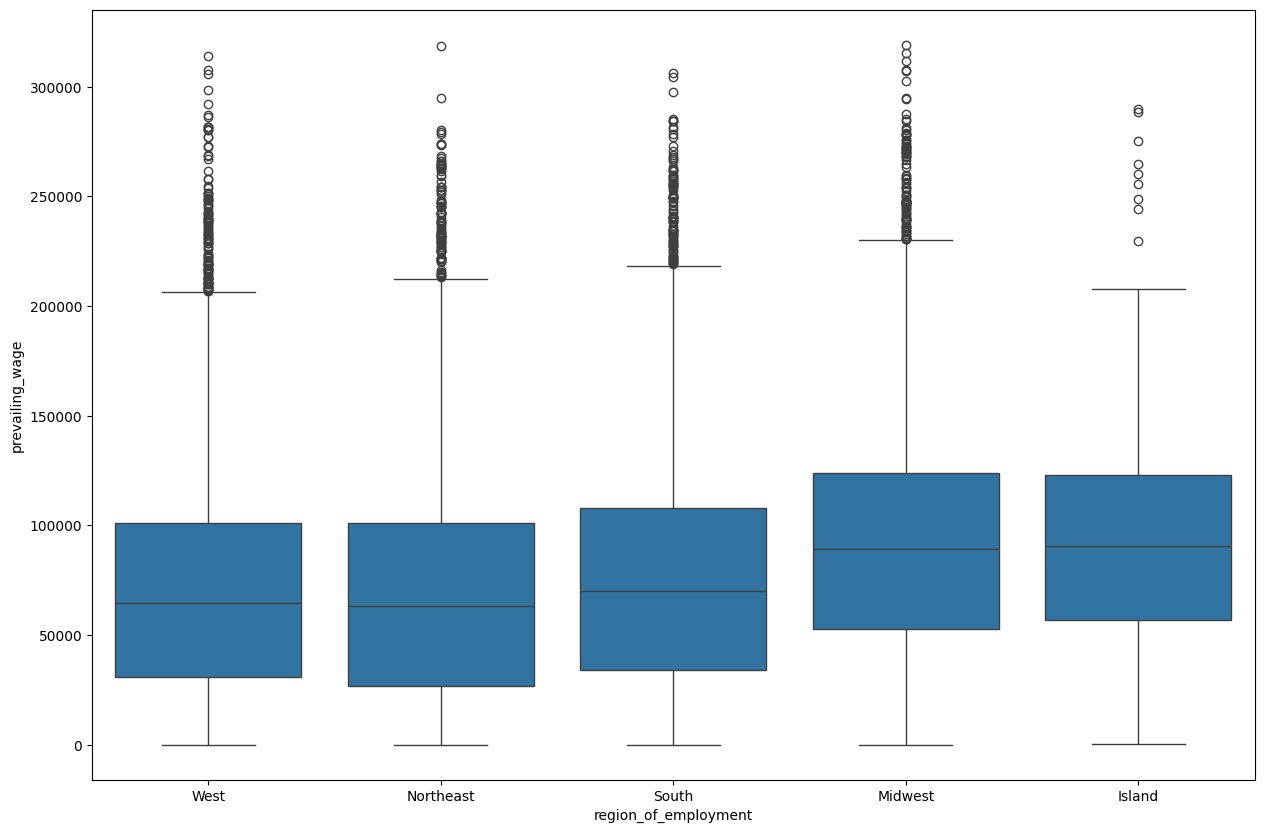

In [23]:
#Creating a boxplot to show distribution of our prevailing wage among the region variable
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='region_of_employment', y='prevailing_wage')
plt.show();

Wages in the West and Northeast are lowest and also very similar at around 60 thousand per year. There is a slight uptick for the South at around 65 thousand. The Midwest and Island areas enjoy highest prevailing wages at around 85-90 thousand. There are multiple outliers for each region, but we'll leave for now as we don't know whether these are typos or actual values.

#### Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?

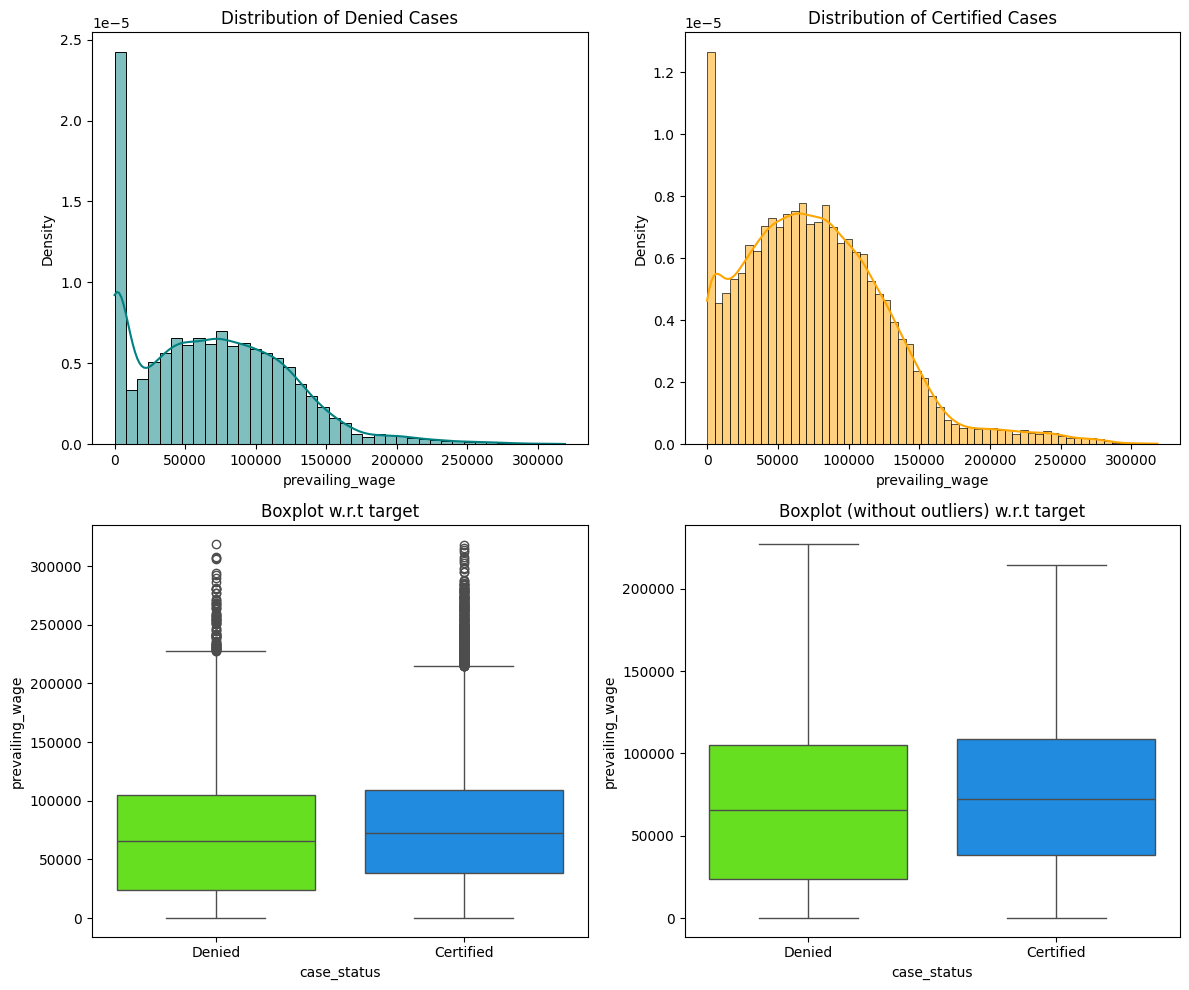

In [24]:
#Visualizing the distribution of case status among the prevailing wage variable.
distribution_plot_wrt_target(df, 'prevailing_wage', 'case_status')

* The data seems to show that slightly higher prevailing wages can lead to more certifications, but the difference is VERY slight.

### Observations on no. of employess and case status

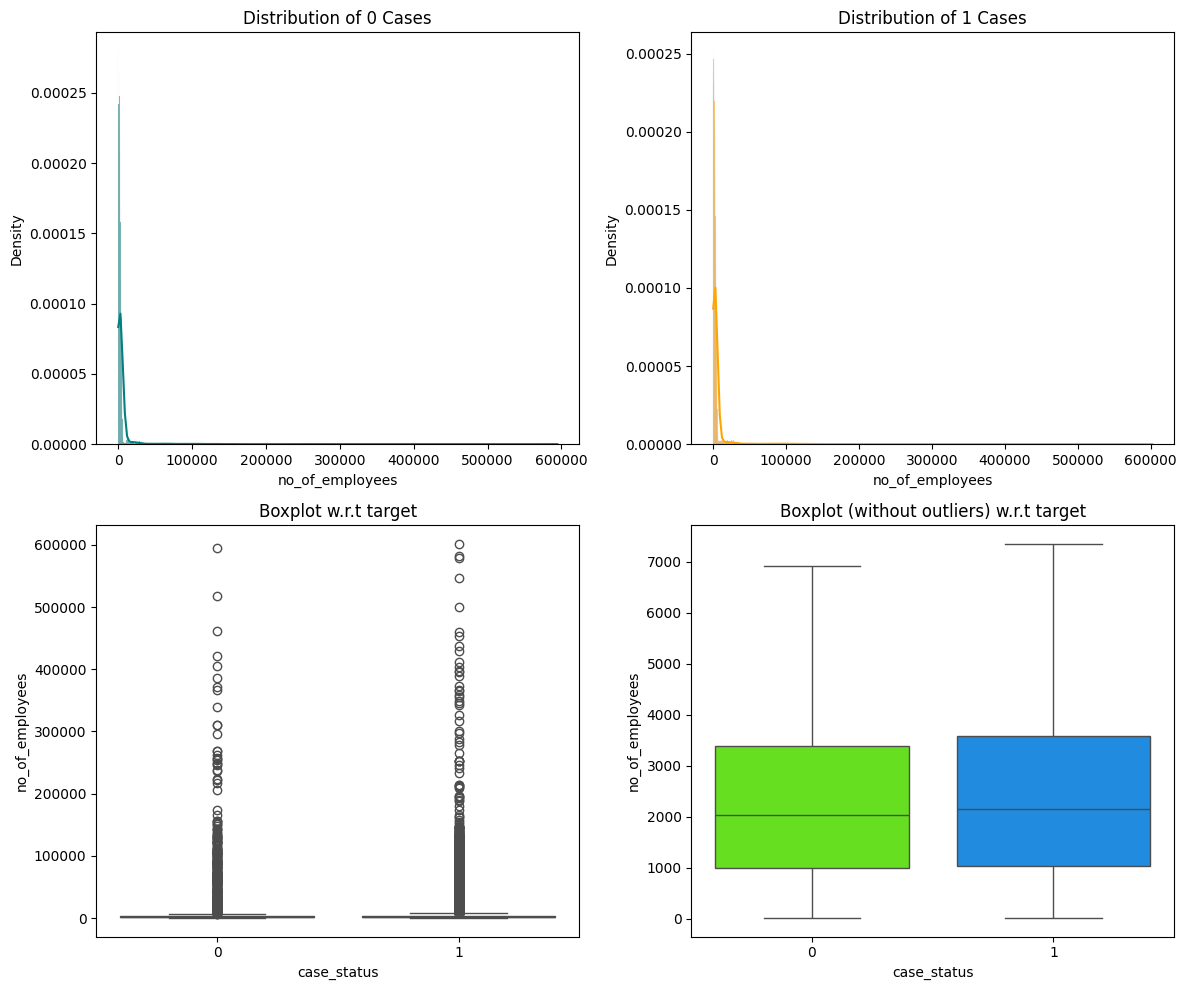

In [72]:
#Visualizing the distribution of case status among the no_of_employees variable.
distribution_plot_wrt_target(df, 'no_of_employees', 'case_status')

* There are so many outliers within the number of employees variable that it makes it difficult to visualize.

* It seems that there is a very slight correlation between the no of employees and case status as certified visas are going to applicants working for larger companies, but the difference is incredibly slight.

### Observations on year of establishment

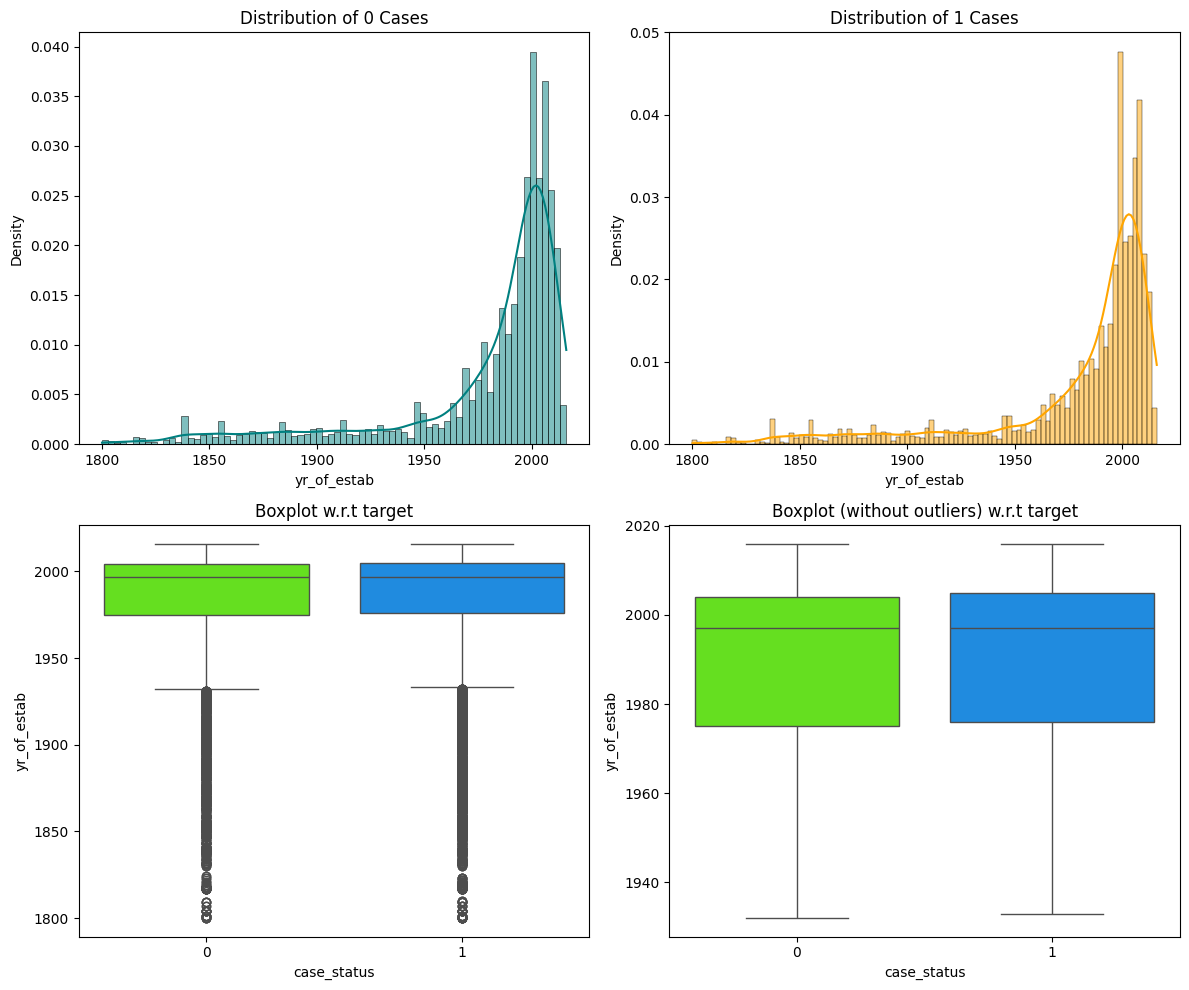

In [73]:
#Visualizing the distribution of case status among the year of establishment variable.
distribution_plot_wrt_target(df, 'yr_of_estab', 'case_status')

#### Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


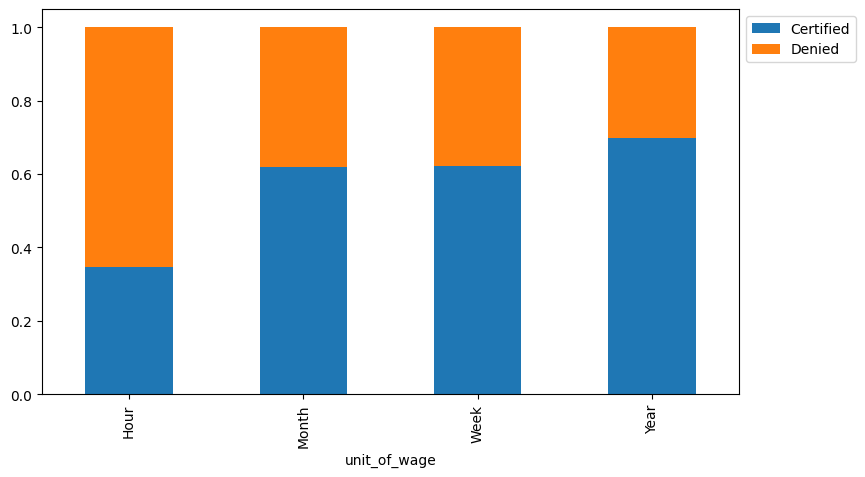

In [25]:
#Visualizing the distribution of case status among unit of wage
stacked_barplot(df, 'unit_of_wage', 'case_status')

* The data suggests that Hourly workers have around a 20+% greater chance of being denied than those with Monthly, Weekly, or Yearly wages.
* Given the nature of the relationship between prevailing wage and case status as well as the distribution for unit of wage, there seems to be more correlation between unit of wage than prevailing wage. Therefore, it seems fit to leave prevailing wage as is and not try to combine these two columns.

## Data Pre-processing

### Outlier Check

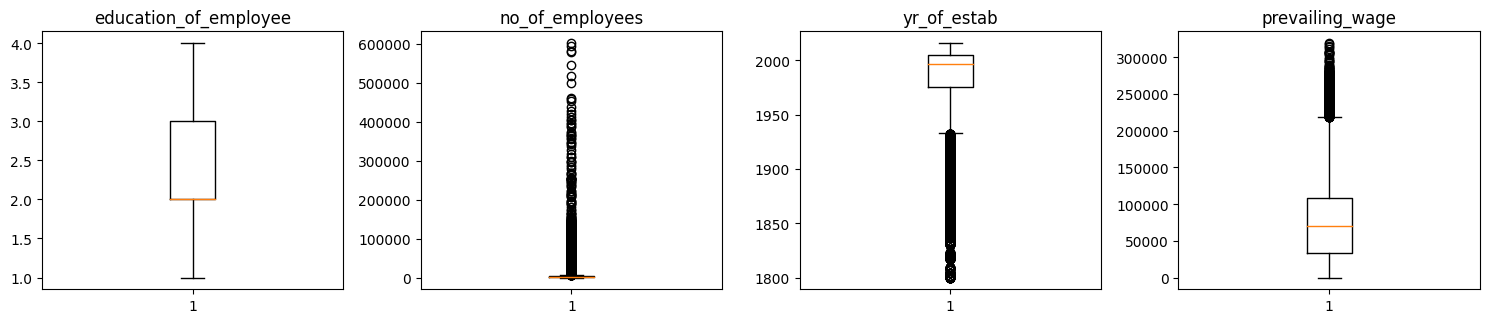

In [26]:
#Creating a boxplot to check for outliers in the dataset
num_cols = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are numerous outliers in all three numeric variables, but as we've seen, these have very little correlation to the target variable, so we will not treat outliers.

### Data Preparation for modeling

In [27]:
# Encoding the target variable
df['case_status'] = df['case_status'].map({'Certified': 1, 'Denied': 0})

In [28]:
#Splitting the dataset into X and y and removing "case ID"
X = df.drop(['case_id', 'case_status'], axis=1)
y = df['case_status']

In [29]:
# Encoding X
X = pd.get_dummies(X, drop_first=True)

In [30]:
#Splitting the dataset into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [31]:
#Splitting the validation set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.1, random_state=1, stratify=y_val)

In [32]:
#Checking our datasets
print("Shape of Training Set: " + str(X_train.shape))
print("Shape of Validation Set: " + str(X_val.shape))
print("Shape of Test Set: " + str(X_test.shape))
print("Percentage of target variables in Training Set: ")
print(y_train.value_counts(normalize=True))
print("Percentage of target variables in Validation Set: ")
print(y_val.value_counts(normalize=True))
print("Percentage of target variables in Test Set: ")
print(y_test.value_counts(normalize=True))

Shape of Training Set: (17836, 19)
Shape of Validation Set: (6879, 19)
Shape of Test Set: (765, 19)
Percentage of target variables in Training Set: 
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of target variables in Validation Set: 
1    0.66783
0    0.33217
Name: case_status, dtype: float64
Percentage of target variables in Test Set: 
1    0.667974
0    0.332026
Name: case_status, dtype: float64


* We've got very similar percentages of the target variables in all data sets now and sizes of the data sets looks good as well.

## Model Building

### Model Evaluation Criterion

**Given that we are trying to shortlist candidates and identify those with higher chances of VISA approval, our strategy will be to use a classification model to minimize false positives and use precision as our metric of choice.**


First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The `model_performance_classification_sklearn` function will be used to check the model performance of models.
* The `confusion_matrix_sklearn` function will be used to plot the confusion matrix.

In [33]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [34]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [35]:
#Setting the scorer to precision score
scorer = metrics.make_scorer(metrics.precision_score)

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with Original data

In [36]:
#Creating multiple models on the original data
models = [] #Empty list to store models in

#Appending model types into the list
models.append(('Dtree', DecisionTreeClassifier(random_state=1)))
models.append(('Bagging', BaggingClassifier(random_state=1)))
models.append(('Random Forest', RandomForestClassifier(random_state=1)))
models.append(('Gradient Boost', GradientBoostingClassifier(random_state=1)))
models.append(('AdaBoost', AdaBoostClassifier(random_state=1)))
models.append(('XGBoost', XGBClassifier(random_state=1, eval_metric='logloss')))

In [37]:
#Creating a dictionaries to store cross-validation results and model names in
results = [] #Empty list to store model results in
names = [] #Empty list to store model names in

In [38]:
#Creating a for loop to loop through each model, cross-validate, and return scores to be compared
print('\n' 'Cross-Validation scores on original training dataset:' '\n')

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_result = cross_val_score(estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold)
    results.append(cv_result)
    names.append(name)
    print('{}: {}'.format(name, cv_result.mean()))

print('\n' 'Validation Performance:' '\n')

for name, model in models:
    model.fit(X_val, y_val)
    scores = precision_score(y_val, model.predict(X_val))
    print('{}: {}'.format(name, scores))


Cross-Validation scores on original training dataset:

Dtree: 0.7451535374776994
Bagging: 0.7775407856507448
Random Forest: 0.7708509708975281
Gradient Boost: 0.7773996349387147
AdaBoost: 0.7581356517832909
XGBoost: 0.7685847793113798

Validation Performance:

Dtree: 1.0
Bagging: 0.9921173636960806
Random Forest: 1.0
Gradient Boost: 0.7829427583557433
AdaBoost: 0.7588322796578654
XGBoost: 0.9083705810646079


* Dtree, Bagging, and Random Forest both generalize well and perform best on the validation set with a ~23-25% improvement over the training set and perfect precision scores on the validation set. However, this could be a red flag that the models are overfitting the validation set as well.

* Gradient Boost and AdaBoost have lower scores on the validation set, but seem to be generalizing well.  XGBoost may be overfitting the validation set.

### Model Building with Oversampled data

In [39]:
print("Before oversampling, count of Certified Visas (1): {}".format(sum(y_train == 1)))
print("Before oversampling, count of Denied Visas (0): {} \n".format(sum(y_train == 0)))

# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=0.75, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After oversampling, count of Certified Visas (1): {}".format(sum(y_train_over == 1)))
print("After oversampling, count of Denied Visas (0): {}".format(sum(y_train_over == 0)))
print("After oversampling, the shape of X_train_over: {}".format(X_train_over.shape))
print("After oversampling, the shape of y_train_over: {}".format(y_train_over.shape))

Before oversampling, count of Certified Visas (1): 11913
Before oversampling, count of Denied Visas (0): 5923 

After oversampling, count of Certified Visas (1): 11913
After oversampling, count of Denied Visas (0): 8934
After oversampling, the shape of X_train_over: (20847, 19)
After oversampling, the shape of y_train_over: (20847,)


In [40]:
models = [] #Empty list for models

#Adding models to the list
models.append(('Dtree', DecisionTreeClassifier(random_state=1)))
models.append(('Bagging', BaggingClassifier(random_state=1)))
models.append(('Random Forest', RandomForestClassifier(random_state=1)))
models.append(('Gradient Boost', GradientBoostingClassifier(random_state=1)))
models.append(('AdaBoost', AdaBoostClassifier(random_state=1)))
models.append(('XGBoost', XGBClassifier(random_state=1, eval_metric='logloss')))

results2 = [] #Creating an empty list to store model's CV scores
names2 = [] #Creating an empty list to store model names

#Loop through each model to get mean CV scores
print('\n' 'Cross-Validation performance on oversampled training set:' '\n')

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_result = cross_val_score(estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold)
    results2.append(cv_result)
    names2.append(name)
    print('{}: {}'.format(name, cv_result.mean()))

print('\n' 'Validation Performance:' '\n')

for name, model in models:
    model.fit(X_val, y_val)
    scores = precision_score(y_val, model.predict(X_val))
    print('{}: {}'.format(name, scores))


Cross-Validation performance on oversampled training set:

Dtree: 0.7429123702200042
Bagging: 0.7766858775227392
Random Forest: 0.7782819686643261
Gradient Boost: 0.7781083160860087
AdaBoost: 0.7637670619840274
XGBoost: 0.775602576427279

Validation Performance:

Dtree: 1.0
Bagging: 0.9921173636960806
Random Forest: 1.0
Gradient Boost: 0.7829427583557433
AdaBoost: 0.7588322796578654
XGBoost: 0.9083705810646079


* All model performances improved slightly on the oversampled data, with the exception of Dtree and Gradient Boost.

* All models still generalize well performing better on validation than training data.

* Dtree, Bagging, and Random Forest are still top models with either perfect or nearly perfect scores on the validation sets.

### Model Building with Undersampled data

In [41]:
# Initiating an instance of RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.75, random_state=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
print("After UnderSampling, counts of lable '1': {}".format(sum(y_train_under == 1)))
print("After UnderSampling, counts of lable '0': {}".format(sum(y_train_under == 0)))
print("After UnderSampling, the shape of X_train_under: {}".format(X_train_under.shape))
print("After UnderSampling, the shape of y_train_under: {}".format(y_train_under.shape))

Before UnderSampling, counts of label '1': 11913
Before UnderSampling, counts of label '0': 5923 

After UnderSampling, counts of lable '1': 7897
After UnderSampling, counts of lable '0': 5923
After UnderSampling, the shape of X_train_under: (13820, 19)
After UnderSampling, the shape of y_train_under: (13820,)


In [42]:
models = [] #Empty list for models

#Adding models to the list
models.append(('Dtree', DecisionTreeClassifier(random_state=1)))
models.append(('Bagging', BaggingClassifier(random_state=1)))
models.append(('Random Forest', RandomForestClassifier(random_state=1)))
models.append(('Gradient Boost', GradientBoostingClassifier(random_state=1)))
models.append(('AdaBoost', AdaBoostClassifier(random_state=1)))
models.append(('XGBoost', XGBClassifier(random_state=1, eval_metric='logloss')))

results3 = [] #Creating an empty list to store model's CV scores
names3 = [] #Creating an empty list to store model names

#Loop through each model to get mean CV scores
print('\n' 'Cross-Validation performance on undersampled training set:' '\n')

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_result = cross_val_score(estimator=model, X=X_train_under, y=y_train_under, scoring=scorer, cv=kfold)
    results3.append(cv_result)
    names3.append(name)
    print('{}: {}'.format(name, cv_result.mean()))

print('\n' 'Validation Performance:' '\n')

for name, model in models:
    model.fit(X_val, y_val)
    scores = precision_score(y_val, model.predict(X_val))
    print('{}: {}'.format(name, scores))


Cross-Validation performance on undersampled training set:

Dtree: 0.6764533785463736
Bagging: 0.7284147270154794
Random Forest: 0.7282900270902714
Gradient Boost: 0.7336241143859249
AdaBoost: 0.7118913030207885
XGBoost: 0.7227427258745645

Validation Performance:

Dtree: 1.0
Bagging: 0.9921173636960806
Random Forest: 1.0
Gradient Boost: 0.7829427583557433
AdaBoost: 0.7588322796578654
XGBoost: 0.9083705810646079


* All model performances decreased on the undersampled training set with the exception of Random Forest.

* After comparing all models, we'll move forward with tuning Dtree on original data, XGBoost on oversampled data, and Random Forest on undersampled data.

## Hyperparameter Tuning

## Tuning Decision Tree on Original Data

In [43]:
# Creating an instance of Decision Tree Classifier to Hyperparameter Tune
dtree2 = DecisionTreeClassifier(random_state=1)

# Parameter Grid
parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
              "min_samples_leaf": np.arange(2, 8, 1),
              "max_features": np.arange(0.3, 0.7, 0.1),
              "max_depth":np.arange(1, 8, 1)}

# Initiating RandomizedSearch object
grid_obj_dtree = RandomizedSearchCV(dtree2, parameters, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs=-1, verbose=1)

#Fitting it to original data
grid_obj_dtree = grid_obj_dtree.fit(X_train, y_train)

#Printing the best parameters
print(grid_obj_dtree.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'min_samples_leaf': 5, 'max_features': 0.6000000000000001, 'max_depth': 7, 'criterion': 'gini'}


In [44]:
# Checking the best CV Score
grid_obj_dtree.best_score_

0.7824929239899437

In [45]:
# Building a Decision Tree with the best parameters
dtree_Tuned_original = DecisionTreeClassifier(criterion='gini', min_samples_leaf=5, max_features=0.6, max_depth=7, random_state=1)

# Fitting on original data
dtree_Tuned_original.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_features=0.6, min_samples_leaf=5,
                       random_state=1)

In [46]:
# Checking the tuned model performance on original data
dtree_Tuned_od_train_perf = model_performance_classification_sklearn(dtree_Tuned_original, X_train, y_train)
dtree_Tuned_od_train_perf


,Accuracy,Recall,Precision,F1
0,0.749383,0.856208,0.787219,0.820265


In [47]:
# Checking the tuned model performance on validation data
dtree_Tuned_od_val_perf = model_performance_classification_sklearn(dtree_Tuned_original, X_val, y_val)
dtree_Tuned_od_val_perf

,Accuracy,Recall,Precision,F1
0,0.730048,0.844362,0.772555,0.806864


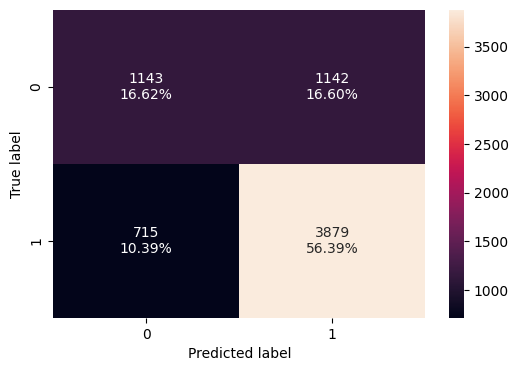

In [58]:
# Checking the confusion matrix for the DTree
confusion_matrix_sklearn(dtree_Tuned_original, X_val, y_val)

* The Tuned Decision Tree has very similar performance on the test and validation sets, so it is generalizing well.

* The ~20% drop in the precision score from the default Dtree model on original data to this model suggests that this model is generalizing much better - the original model may have overfit the validation data.

## Tuning Random Forest on Undersampled Data

**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

---

In [48]:
#Creating a new instance of Random Forest for Hyperparameter Tuning on Undersampled Data
rf2 = RandomForestClassifier(random_state=1)

# Setting the parameter grid
parameters_rf = {'n_estimators': [50, 75, 100, 125, 150],
                "min_samples_leaf": np.arange(1, 10, 1),
                "max_features": np.arange(0.3, 0.7, 0.1),
                "max_samples": np.arange(0.5, 1.0, 0.1),}

# Initiating RandomizedSearch object
grid_obj_rf2 = RandomizedSearchCV(rf2, parameters_rf, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs=-1, verbose=1)

#Fitting it to undersampled data
grid_obj_rf2 = grid_obj_rf2.fit(X_train_under, y_train_under)

#Printing the best parameters
print(grid_obj_rf2.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'n_estimators': 125, 'min_samples_leaf': 3, 'max_samples': 0.7999999999999999, 'max_features': 0.3}


In [49]:
# Checking the best CV Score
grid_obj_rf2.best_score_

0.7380011956896538

In [50]:
# Building a RandomForestClassifier with the best parameters
rf_Tuned_under = RandomForestClassifier(n_estimators=125, min_samples_leaf=3, max_samples=0.79, max_features=0.3, random_state=1)

# Fitting on original data
rf_Tuned_under.fit(X_train_under, y_train_under)

RandomForestClassifier(max_features=0.3, max_samples=0.79, min_samples_leaf=3,
                       n_estimators=125, random_state=1)

In [51]:
# Checking the tuned model performance on undersampled data
rf_Tuned_under_train_perf = model_performance_classification_sklearn(rf_Tuned_under, X_train_under, y_train_under)
rf_Tuned_under_train_perf

,Accuracy,Recall,Precision,F1
0,0.84233,0.890971,0.842231,0.865916


In [52]:
# Checking the tuned model performance on the validation set
rf_Tuned_under_val_perf = model_performance_classification_sklearn(rf_Tuned_under, X_val, y_val)
rf_Tuned_under_val_perf

,Accuracy,Recall,Precision,F1
0,0.724669,0.790596,0.795793,0.793186


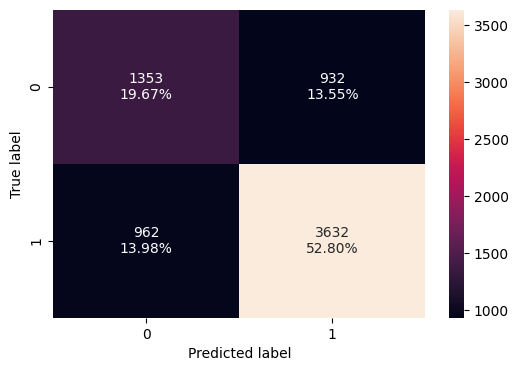

In [59]:
# Checking the confusion matrix for Random Forest on undersampled data
confusion_matrix_sklearn(rf_Tuned_under, X_val, y_val)

* Random Forest Tuned on Undersampled Data is now very slightly overfitting as the precision score on the validation set is about 5% lower than the training set.

* The ~20% drop in the precision score from the default RF model on original data to this model suggests that this model is generalizing much better - the original model may have overfit the validation data.

* Incidentally, the recall and F1 scores for RF are slightly lower than the Dtree, but precision is 2% better.

## Tuning XGBoost on Oversampled Data

**Best practices for hyperparameter tuning in XGBoost:**

`n_estimators`:

* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time

`subsample`:

* Common values: 0.5, 0.7, 0.8, 1.0
* Use `0.7–0.9` to introduce randomness and reduce overfitting
* `1.0` uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large

`gamma`:

* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data


`colsample_bytree`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use `1.0` when you want all features considered for every tree


`colsample_bylevel`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with `colsample_bytree` for fine control over feature sampling

---

In [53]:
#Creating a new instance of Random Forest for Hyperparameter Tuning on Undersampled Data
XG2 = XGBClassifier(random_state=1, eval_metric='logloss')

# Setting the parameter grid
parameters_xg = {'n_estimators': [50, 75, 100, 125, 150],
                'subsample': [0.5, 0.9, 0.1],
                'gamma': [0.2, 0.3, 0.5, 1, 3, 5, 8],
                'colsample_bytree': [0.3, 0.5, 0.7, 1.0],
                'colsample_bylevel': [0.3, 0.5, 0.7, 1.0]}

# Initiating RandomizedSearch object
grid_obj_XG2 = RandomizedSearchCV(XG2, parameters_xg, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs=-2, verbose=1)

#Fitting it to undersampled data
grid_obj_XG2 = grid_obj_XG2.fit(X_train_over, y_train_over)

#Printing the best parameters
print(grid_obj_XG2.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'subsample': 0.9, 'n_estimators': 150, 'gamma': 5, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.7}


In [54]:
# Checking the best CV Score
grid_obj_XG2.best_score_

0.7905406873801399

In [55]:
# Building an XGBoostClassifier with the best parameters
XG_Tuned_over = XGBClassifier(n_estimators=150,subsample=0.9, gamma=5, colsample_bytree=1, colsample_bylevel=0.7, random_state=1)

# Fitting on original data
XG_Tuned_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [56]:
# Checking the tuned model performance on oversampled data
XG_Tuned_over_train_perf = model_performance_classification_sklearn(XG_Tuned_over, X_train_over, y_train_over)
XG_Tuned_over_train_perf

,Accuracy,Recall,Precision,F1
0,0.787355,0.854697,0.790283,0.821228


In [57]:
# Checking the tuned model performance on the validation set
XG_Tuned_over_val_perf = model_performance_classification_sklearn(XG_Tuned_over, X_val, y_val)
XG_Tuned_over_val_perf

,Accuracy,Recall,Precision,F1
0,0.739061,0.844145,0.782328,0.812062


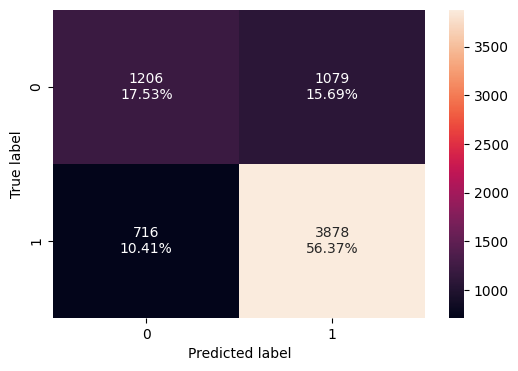

In [60]:
# Checking the confusion matrix for XGB on oversampled data
confusion_matrix_sklearn(XG_Tuned_over, X_val, y_val)

* The XGBoost model on undersampled data is generalizing very well with very similar scores on the train and validation sets.

* Precision score on XGB is about 1.5% lower than Random Forest, but recall, accuracy and the F1 score are all better than Random Forest.

## Model Performance Summary and Final Model Selection

In [61]:
# Training Performance Comparison
models_train_comp_df = pd.concat([dtree_Tuned_od_train_perf.T, rf_Tuned_under_train_perf.T, XG_Tuned_over_train_perf.T], axis=1)
models_train_comp_df.columns = ['Decision Tree tuned with original data', 'Random Forest tuned with undersampled data', 'XGBoost tuned with oversampled data']
print('Training Performance Comparison')
models_train_comp_df

Training Performance Comparison


,Decision Tree tuned with original data,Random Forest tuned with undersampled data,XGBoost tuned with oversampled data
Accuracy,0.749383,0.842330,0.787355
Recall,0.856208,0.890971,0.854697
Precision,0.787219,0.842231,0.790283
F1,0.820265,0.865916,0.821228


* Random Forest on undersampled data is giving us the highest scores across all metrics.
* Random Forest has the highest precision score on the training set, followed by XGBoost and DTree.

In [62]:
# Validation Performance Comparison
models_val_comp_df = pd.concat([dtree_Tuned_od_val_perf.T, rf_Tuned_under_val_perf.T, XG_Tuned_over_val_perf.T], axis=1)
models_val_comp_df.columns = ['Decision Tree tuned with original data', 'Random Forest tuned with undersampled data', 'XGBoost tuned with oversampled data']
print('Validation Performance Comparison')
models_val_comp_df

Validation Performance Comparison


,Decision Tree tuned with original data,Random Forest tuned with undersampled data,XGBoost tuned with oversampled data
Accuracy,0.730048,0.724669,0.739061
Recall,0.844362,0.790596,0.844145
Precision,0.772555,0.795793,0.782328
F1,0.806864,0.793186,0.812062


* Random Forest gives us the best precision score on the validation set, followed by XGBoost and DTree.

* It should be noted that XGBoost outperformed Random Forest on all other metrics and is only 1.3% lower on precision score. This should be taken into account by the customer as the precision scores on all three models only vary by 2.3% while the other metrics have improved by as much as 4.4% on recall.

* Based on the precision scores of the tuned models on the validations sets, we'll pick Random Forest tuned with undersampled data as our final model.

In [63]:
# Selecting the final model
final_model = rf_Tuned_under

#Checking the final model performance against the test set
test = model_performance_classification_sklearn(final_model, X_test, y_test)
test

,Accuracy,Recall,Precision,F1
0,0.746405,0.812133,0.808967,0.810547


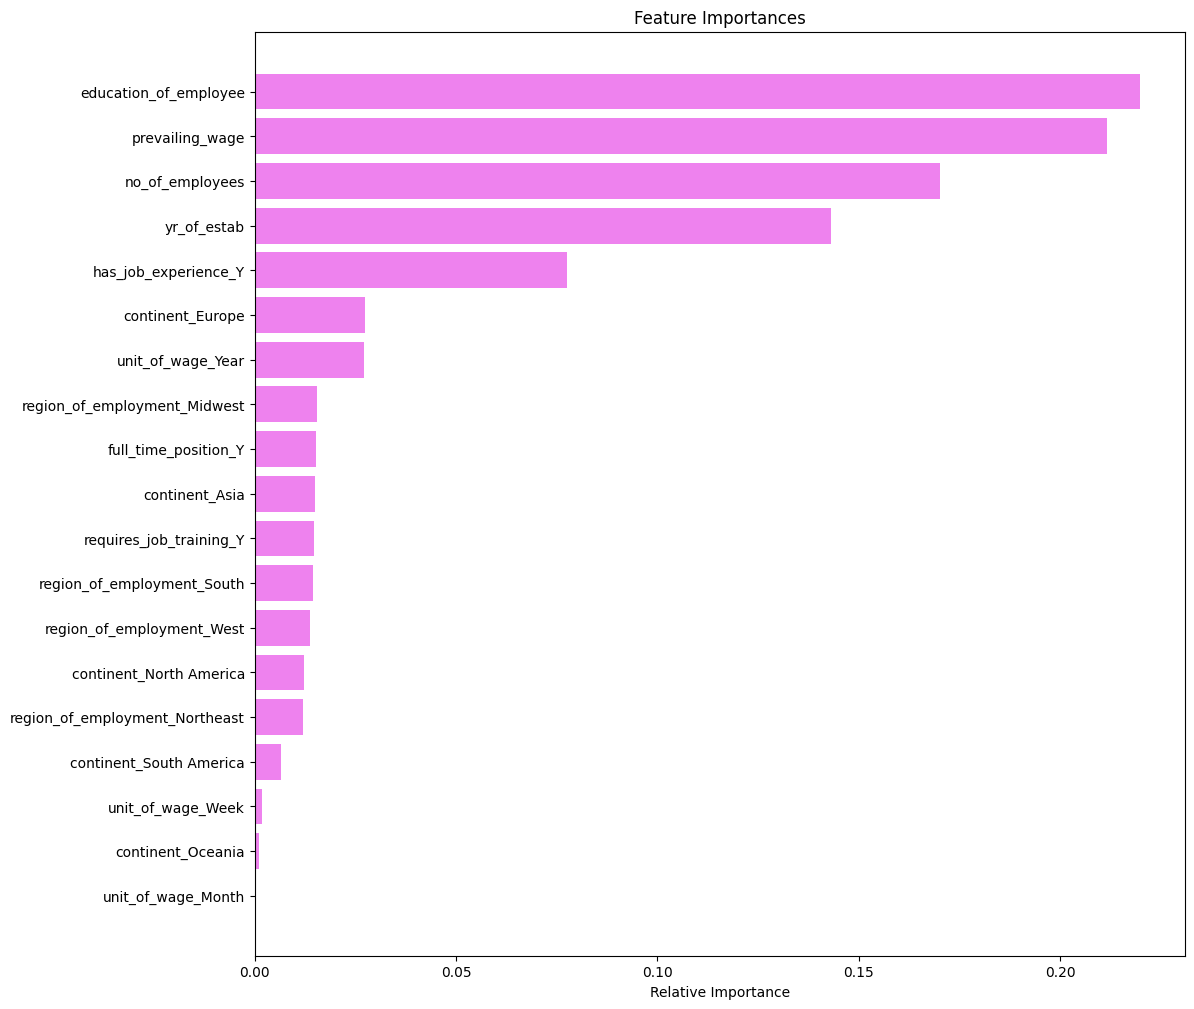

In [64]:
feature_names = X_train.columns
importances = final_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The top 5 features in order of importance are:
1. Education of employee
2. Prevailing wage
3. Number of employess
4. Year of establishment
5. Has job experience

## Actionable Insights and Recommendations

1.   According to the dataset, the more educated an employee is, the better the chance that their visa will be certified. For example, Doctors have around an ~85% chance of being certified while those with only a High School diploma have around a ~35% chance of being certified. The model will pre-approve most doctors and masters, however, if we find applicants with those credentials are not pre-approved, we can take a closer look at them to make a final determination.

2. Industries with higher prevailing wages tend to produce more certified applicants. We can find a suitable cutoff (around $150K per year or so) to pre-certify individual making that amount or more per year.

3. The number of employees at the company that an applicant is going to work for will contribute to their certification. Companies with higher employee counts tend to have more certified candidates. Consider pre-approving applicants going to work for large corporations as long as they are highly educated and in industries with higher wages.

4. The year a company is established contributes slightly to the certification of applicants. There is only about a 5% difference in the number of certified applicants vs. denied applicants for any given year of establishment. However, it is noteworthy that certifications fall off significantly for older companies and startups.  Focus on approvals for applicants going to work for companies established in the sweet spot of the years between ~ 1990 - 2005.

5. Finally, applicants with existing job experience have about a 20% greater chance of being certified. As long as they meet or come close to the standards set by the above variables, consider pre-approving applicants with job experience.


<font size=6 color='blue'>Power Ahead</font>
___